# Convolutional neural networks 101

Convolution neural networks are one of the most successful types of neural networks for image recognition and an integral part of reigniting the interest in neural networks. They are able to extract structural relations in the data, such as spatial in images or temporal in time series.

In this lab, we will experiment with inserting 2D-convolution layers in the fully connected neural networks introduced previously. We will also try to visualize the learned convolution filters and try to understand what kind of features they learn to recognize.

If you have not watched Jason Yosinski's [video on visualizing convolutional networks](https://www.youtube.com/watch?v=AgkfIQ4IGaM), you definitely should do so now. If you are unfamiliar with the convolution operation, [Vincent Dumoulin](https://github.com/vdumoulin/conv_arithmetic) has a nice visualization of different convolution variants. For a more in-depth tutorial, please see http://cs231n.github.io/convolutional-networks/ or http://neuralnetworksanddeeplearning.com/chap6.html.

## Reminder: what are convolutional networks?

Standard ConvNets are, in many respects, very similar to the dense feedforward networks we saw previously:
 * The network is still organized into layers.
 * Each layer is parameterized by weights and biases.
 * Each layer has an element-wise non-linear transformation (activation function).
 * There are no cycles in the connections (more on this in later labs).

*So what is the difference?*
The networks we saw previously are called *dense* because each unit receives input from all the units in the previous layer. This is not the case for ConvNets. In ConvNets each unit is only connected to a small subset of the input units. This is called the *receptive field* of the unit.

#### Example
The input (green matrix) is a tensor of size `1x5x5` -- i.e. it has one "channel" (like a grayscale image), and the feature map has size `5x5`. Let us define a `1x3x3` kernel (yellow submatrix). The kernel weights are indicated in red at the bottom right of each element. The computation can be thought of as an elementwise multiplication followed by a sum. Here we use a *stride* of 1, as shown in this animation:

<img src="https://raw.githubusercontent.com/DeepLearningDTU/02456-deep-learning-with-PyTorch/master/4_Convolutional/images/convolutions.gif" style="width: 400px;"/>

GIF courtesy of [Stanford](http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution)

After having convolved the image, we perform an elementwise non-linear transformation on the *convolved features*.
In this example, the input is a 2D *feature map* with depth 1.


### Assignment 1.1: Manual calculations

Perform the following computation, and write the result below.

![Image](https://raw.githubusercontent.com/DeepLearningDTU/02456-deep-learning-with-PyTorch/master/4_Convolutional/images/conv_exe.png)

1. Manually convolve the input, and compute the convolved features. No padding and stride of 1.

#### Answer:
### Convolution Calculation

Perform the following convolution operation manually with no padding and stride of 1.

#### Input:
\[
\begin{bmatrix}
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 2 \\
0 & 0 & 2 & 3 \\
0 & 1 & 2 & 3 \\
\end{bmatrix}
\]

#### Kernel:
\[
\begin{bmatrix}
0 & 0 & 2 \\
0 & 1 & 2 \\
0 & 2 & 3 \\
\end{bmatrix}
\]

#### Stride: 
1

#### Padding: 
0

### Convolution Process

For each position, the output is the sum of the element-wise product of the kernel and the corresponding part of the input matrix.

- **Position (0, 0)**:
  \[
  \begin{aligned}
  &\begin{bmatrix}
  0 & 0 & 0 \\
  0 & 0 & 1 \\
  0 & 0 & 2 \\
  \end{bmatrix}
  \ast
  \begin{bmatrix}
  0 & 0 & 2 \\
  0 & 1 & 2 \\
  0 & 2 & 3 \\
  \end{bmatrix}
  = (0 \times 0) + (0 \times 0) + (0 \times 2) \\
  &+ (0 \times 0) + (0 \times 1) + (1 \times 2) + (0 \times 0) + (0 \times 2) + (2 \times 3) \\
  &= 0 + 0 + 0 + 0 + 0 + 2 + 0 + 0 + 6 = 8
  \end{aligned}
  \]

- **Position (0, 1)**:
  \[
  \begin{aligned}
  &\begin{bmatrix}
  0 & 0 & 1 \\
  0 & 1 & 2 \\
  0 & 2 & 3 \\
  \end{bmatrix}
  \ast
  \begin{bmatrix}
  0 & 0 & 2 \\
  0 & 1 & 2 \\
  0 & 2 & 3 \\
  \end{bmatrix}
  = (0 \times 0) + (0 \times 0) + (1 \times 2) \\
  &+ (0 \times 0) + (1 \times 1) + (2 \times 2) + (0 \times 0) + (2 \times 2) + (3 \times 3) \\
  &= 0 + 0 + 2 + 0 + 1 + 4 + 0 + 4 + 9 = 20
  \end{aligned}
  \]

- **Position (1, 0)**:
  \[
  \begin{aligned}
  &\begin{bmatrix}
  0 & 0 & 1 \\
  0 & 0 & 2 \\
  0 & 1 & 2 \\
  \end{bmatrix}
  \ast
  \begin{bmatrix}
  0 & 0 & 2 \\
  0 & 1 & 2 \\
  0 & 2 & 3 \\
  \end{bmatrix}
  = (0 \times 0) + (0 \times 0) + (1 \times 2) \\
  &+ (0 \times 0) + (0 \times 1) + (2 \times 2) + (0 \times 0) + (1 \times 2) + (2 \times 3) \\
  &= 0 + 0 + 2 + 0 + 0 + 4 + 0 + 2 + 6 = 14
  \end{aligned}
  \]

- **Position (1, 1)**:
  \[
  \begin{aligned}
  &\begin{bmatrix}
  0 & 1 & 2 \\
  0 & 2 & 3 \\
  1 & 2 & 3 \\
  \end{bmatrix}
  \ast
  \begin{bmatrix}
  0 & 0 & 2 \\
  0 & 1 & 2 \\
  0 & 2 & 3 \\
  \end{bmatrix}
  = (0 \times 0) + (1 \times 0) + (2 \times 2) \\
  &+ (0 \times 0) + (2 \times 1) + (3 \times 2) + (1 \times 0) + (2 \times 2) + (3 \times 3) \\
  &= 0 + 0 + 4 + 0 + 2 + 6 + 0 + 4 + 9 = 25
  \end{aligned}
  \]

### Final Convolution Output:
\[
\begin{bmatrix}
8 & 20 \\
14 & 25 \\
\end{bmatrix}
\]


---

2. Perform `2x2` max pooling on the convolved features. Stride of 2.

#### Answer:
### Max Pooling Calculation

Perform $2 \times 2$ max pooling on the convolved features with a stride of 2.

#### Convolved Features:
$$
\begin{bmatrix}
8 & 20 \\
14 & 25 \\
\end{bmatrix}
$$

### Max Pooling Process:

1. The convolved feature map is $2 \times 2$, so we apply max pooling over the entire region.

   $$
   \text{Max} \left( \begin{bmatrix}
   8 & 20 \\
   14 & 25 \\
   \end{bmatrix} \right) = 25
   $$

### Final Max Pooling Output:
$$
\begin{bmatrix}
25
\end{bmatrix}
$$


This completes both the convolution and max pooling steps.


### Assignment 1.2: Output dimensionality

Given the following 3D tensor input `(channel, height, width)`, a given amount (`channels_out`) of filters `(channels_in, filter_height, filter_width)`, stride `(height, width)` and padding `(height, width)`, calculate the output dimensionality if it is valid.

1. input tensor with dimensionality (1, 28, 28) and 16 filters of size (1, 5, 5) with stride (1, 1) and padding (0, 0)
 * **Answer:** 
2. input tensor with dimensionality (2, 32, 32) and 24 filters of size (2, 3, 3) with stride (1, 1) and padding (0, 0)
 * **Answer:** 
3. input tensor with dimensionality (10, 32, 32) and 3 filters of size (10, 2, 2) with stride (2, 2) and padding (0, 0)
 * **Answer:** 
4. input tensor with dimensionality (11, 8, 16) and 7 filters of size (11, 3, 3) with stride (2, 2) and padding (1, 1)
 * **Answer:** 
5. input tensor with dimensionality (128, 256, 256) and 112 filters of size (128, 3, 3) with stride (1, 1) and padding (1, 1)
 * **Answer:** 

### 1. Input tensor (1, 28, 28) with 16 filters (1, 5, 5), stride (1, 1), and padding (0, 0)

#### Calculation:
- Input size: (28, 28)
- Filter size: (5, 5)
- Stride: (1, 1)
- Padding: (0, 0)

$
\text{Output Height} = \left\lfloor \frac{28 - 5 + 2 \times 0}{1} \right\rfloor + 1 = \left\lfloor \frac{23}{1} \right\rfloor + 1 = 24
$

$
\text{Output Width} = \left\lfloor \frac{28 - 5 + 2 \times 0}{1} \right\rfloor + 1 = 24
$

#### Output shape: **(16, 24, 24)**

---

### 2. Input tensor (2, 32, 32) with 24 filters (2, 3, 3), stride (1, 1), and padding (0, 0)

#### Calculation:
- Input size: (32, 32)
- Filter size: (3, 3)
- Stride: (1, 1)
- Padding: (0, 0)

$
\text{Output Height} = \left\lfloor \frac{32 - 3 + 2 \times 0}{1} \right\rfloor + 1 = \left\lfloor \frac{29}{1} \right\rfloor + 1 = 30
$

$
\text{Output Width} = \left\lfloor \frac{32 - 3 + 2 \times 0}{1} \right\rfloor + 1 = 30
$

#### Output shape: **(24, 30, 30)**

---

### 3. Input tensor (10, 32, 32) with 3 filters (10, 2, 2), stride (2, 2), and padding (0, 0)

#### Calculation:
- Input size: (32, 32)
- Filter size: (2, 2)
- Stride: (2, 2)
- Padding: (0, 0)

$
\text{Output Height} = \left\lfloor \frac{32 - 2 + 2 \times 0}{2} \right\rfloor + 1 = \left\lfloor \frac{30}{2} \right\rfloor + 1 = 16
$

$
\text{Output Width} = \left\lfloor \frac{32 - 2 + 2 \times 0}{2} \right\rfloor + 1 = 16
$

#### Output shape: **(3, 16, 16)**

---

### 4. Input tensor (11, 8, 16) with 7 filters (11, 3, 3), stride (2, 2), and padding (1, 1)

#### Calculation:
- Input size: (8, 16)
- Filter size: (3, 3)
- Stride: (2, 2)
- Padding: (1, 1)

$
\text{Output Height} = \left\lfloor \frac{8 - 3 + 2 \times 1}{2} \right\rfloor + 1 = \left\lfloor \frac{8}{2} \right\rfloor + 1 = 5
$

$
\text{Output Width} = \left\lfloor \frac{16 - 3 + 2 \times 1}{2} \right\rfloor + 1 = \left\lfloor \frac{16}{2} \right\rfloor + 1 = 9
$

#### Output shape: **(7, 5, 9)**

---

### 5. Input tensor (128, 256, 256) with 112 filters (128, 3, 3), stride (1, 1), and padding (1, 1)

#### Calculation:
- Input size: (256, 256)
- Filter size: (3, 3)
- Stride: (1, 1)
- Padding: (1, 1)

$
\text{Output Height} = \left\lfloor \frac{256 - 3 + 2 \times 1}{1} \right\rfloor + 1 = \left\lfloor \frac{256}{1} \right\rfloor + 1 = 256
$

$
\text{Output Width} = \left\lfloor \frac{256 - 3 + 2 \times 1}{1} \right\rfloor + 1 = 256
$

#### Output shape: **(112, 256, 256)**


# Load packages

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.metrics import accuracy_score
from torch.utils.data import TensorDataset, DataLoader
from torchvision.utils import make_grid

sns.set_style("whitegrid")


# Load MNIST data

The code below downloads and loads the same MNIST dataset as before.
Note however that the data has a different shape this time: `(num_samples, num_channels, height, width)`.

In [14]:
import os
import urllib.request

# Check if file exists
if not os.path.isfile('mnist.npz'):
    print("Downloading mnist.npz...")
    url = "https://www.dropbox.com/s/qxywaq7nx19z72p/mnist.npz?dl=1"  # Corrected URL for direct download
    urllib.request.urlretrieve(url, 'mnist.npz')
    print("Download complete.")
else:
    print("mnist.npz already downloaded.")


mnist.npz already downloaded.


In [15]:
# Load the MNIST data. 

# Note that we reshape the data from:
#   (nsamples, num_features) = (nsamples, channels * height * width)
# to:
#   (nsamples, channels, height, width)
# in order to retain the spatial arrangements of the pixels.

data = np.load('mnist.npz')
channels, height, width = 1, 28, 28


def get_data(split, size):
    x = data[f"X_{split}"][:size].astype('float32')
    x = x.reshape((-1, channels, height, width))
    targets = data[f"y_{split}"][:size].astype('int64')
    return torch.from_numpy(x), torch.from_numpy(targets)


x_train, targets_train = get_data('train', 50000)
x_valid, targets_valid = get_data('valid', 2000)
x_test, targets_test = get_data('test', 5000)

num_classes = len(np.unique(targets_train))

print("Information on dataset")
print("Shape of x_train:", x_train.shape)
print("Shape of targets_train:", targets_train.shape)
print("Shape of x_valid:", x_valid.shape)
print("Shape of targets_valid:", targets_valid.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of targets_test:", targets_test.shape)

Information on dataset
Shape of x_train: torch.Size([50000, 1, 28, 28])
Shape of targets_train: torch.Size([50000])
Shape of x_valid: torch.Size([2000, 1, 28, 28])
Shape of targets_valid: torch.Size([2000])
Shape of x_test: torch.Size([5000, 1, 28, 28])
Shape of targets_test: torch.Size([5000])


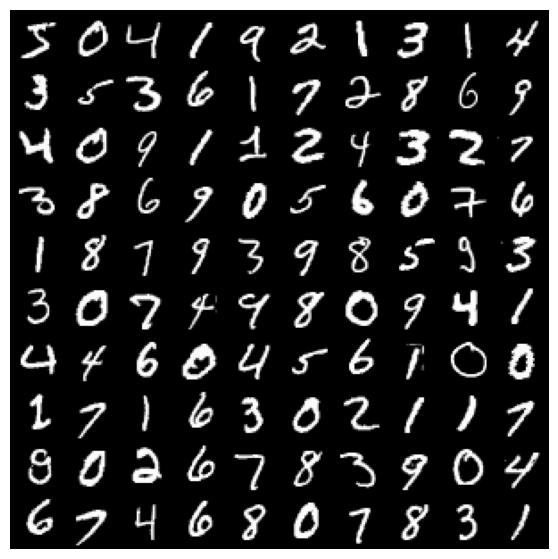

In [16]:
# Plot a few MNIST examples
plt.figure(figsize=(7, 7))
plt.imshow(make_grid(x_train[:100], nrow=10).permute(1, 2, 0))
plt.axis('off')
plt.show()

# Define a simple feed forward neural network

In [17]:
# Ensure that the input data's shape matches the expected (channels, height, width)
# This assertion helps prevent errors if the dataset shape doesn't match what the model expects
assert (channels, height, width) == x_train.shape[1:]

# Compute the total number of features by multiplying channels, height, and width
# This is needed because we're flattening the input into a 1D vector before passing it through the fully connected layers
n_features = channels * height * width


class PrintSize(nn.Module):
    """
    Utility module to print the current shape of a Tensor during the first forward pass in a Sequential module.
    This is useful for debugging and ensuring that the data has the expected shape as it flows through the model.
    """

    first = True  # This flag ensures that the size is printed only once during the first forward pass

    def forward(self, x):
        if self.first:
            # Print the size of the input tensor
            print(f"Size: {x.size()}")
            self.first = False  # After the first forward pass, this will be False, and size won't be printed again
        return x


class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        
        # Define the activation function (ReLU in this case) to use in the model layers
        activation_fn = nn.ReLU

        # Define the network architecture using nn.Sequential for a clean, layered model
        self.net = nn.Sequential(
            nn.Flatten(),  # Flatten the input from (batch_size, channels, height, width) to (batch_size, channels * height * width)
            nn.Linear(n_features, 128),  # Fully connected layer with input size `n_features` and 128 output nodes
            activation_fn(),  # Apply ReLU activation
            nn.Linear(128, 128),  # Another fully connected layer with 128 inputs and outputs
            activation_fn(),  # Apply ReLU activation again
            nn.Linear(128, num_classes)  # Output layer: maps 128 features to the number of classes (num_classes)
        )

    def forward(self, x):
        # Forward pass through the network
        return self.net(x)


# Create an instance of the model
model = Model()

# Print the architecture of the model to check its structure
print(model)

# Define the loss function (CrossEntropyLoss is commonly used for classification problems)
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer (Adam optimizer is used here with a learning rate of 1e-3)
optimizer = optim.Adam(model.parameters(), lr=1e-3)


Model(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [18]:
# Test the forward pass with dummy data
out = model(torch.randn(2, 1, 28, 28))
print("Output shape:", out.size())
print(f"Output logits:\n{out.detach().numpy()}")
print(f"Output probabilities:\n{out.softmax(1).detach().numpy()}")

Output shape: torch.Size([2, 10])
Output logits:
[[ 0.04745483 -0.10351293  0.06595841 -0.05248981 -0.06775036  0.1634486
   0.10882741  0.02291705  0.02892557  0.10003439]
 [-0.09320986 -0.08954303 -0.01122747 -0.1689716  -0.13221574  0.18682042
  -0.06462105  0.11476604 -0.04742545 -0.07485864]]
Output probabilities:
[[0.10129358 0.08709986 0.10318532 0.09165929 0.09027114 0.11375156
  0.10770495 0.09883831 0.09943397 0.10676206]
 [0.09410334 0.09444904 0.10214321 0.08723728 0.09050342 0.1245147
  0.09683246 0.11585847 0.09851196 0.09584619]]


# Train network

In [19]:
batch_size = 64
num_epochs = 5
validation_every_steps = 500

train_set = TensorDataset(x_train, targets_train)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=True)
valid_set = TensorDataset(x_valid, targets_valid)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=False, drop_last=False)
test_set = TensorDataset(x_test, targets_test)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, drop_last=False)

step = 0
model.train()

train_accuracies = []
valid_accuracies = []
        
for epoch in range(num_epochs):
    
    train_accuracies_batches = []
    
    for inputs, targets in train_loader:
        
        # Forward pass.
        output = model(inputs)
        
        # Compute loss.
        loss = loss_fn(output, targets)
        
        # Clean up gradients from the model.
        optimizer.zero_grad()
        
        # Compute gradients based on the loss from the current batch (backpropagation).
        loss.backward()
        
        # Take one optimizer step using the gradients computed in the previous step.
        optimizer.step()
        
        step += 1
        
        # Compute accuracy.
        predictions = output.max(1)[1]
        train_accuracies_batches.append(accuracy_score(targets, predictions))
        
        if step % validation_every_steps == 0:
            
            # Append average training accuracy to list.
            train_accuracies.append(np.mean(train_accuracies_batches))
            
            train_accuracies_batches = []
        
            # Compute accuracies on validation set.
            valid_accuracies_batches = []
            with torch.no_grad():
                model.eval()
                for inputs, targets in valid_loader:
                    output = model(inputs)
                    loss = loss_fn(output, targets)

                    predictions = output.max(1)[1]

                    # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=False).
                    valid_accuracies_batches.append(accuracy_score(targets, predictions) * len(inputs))

                model.train()
                
            # Append average validation accuracy to list.
            valid_accuracies.append(np.sum(valid_accuracies_batches) / len(x_valid))
     
            print(f"Step {step:<5}   training accuracy: {train_accuracies[-1]}")
            print(f"             validation accuracy: {valid_accuracies[-1]}")

print("Finished training.")

Step 500     training accuracy: 0.87921875
             validation accuracy: 0.9375
Step 1000    training accuracy: 0.951912100456621
             validation accuracy: 0.952
Step 1500    training accuracy: 0.95784375
             validation accuracy: 0.9655
Step 2000    training accuracy: 0.9685716324200914
             validation accuracy: 0.968
Step 2500    training accuracy: 0.9774084394904459
             validation accuracy: 0.9715
Step 3000    training accuracy: 0.977375
             validation accuracy: 0.9705
Step 3500    training accuracy: 0.9815907579787234
             validation accuracy: 0.9695
Finished training.


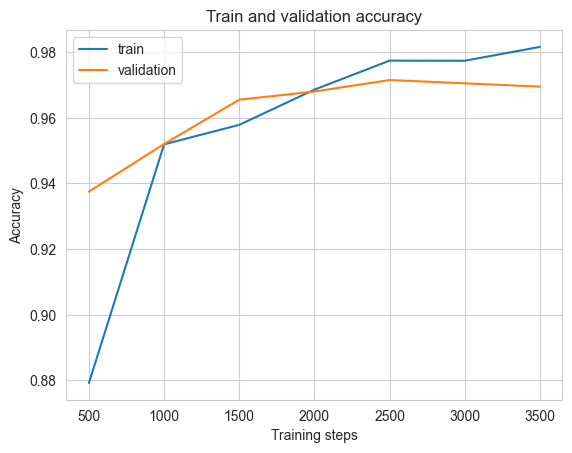

Validation accuracy: 0.970
Test accuracy: 0.965


In [20]:
steps = (np.arange(len(train_accuracies), dtype=int) + 1) * validation_every_steps

plt.figure()
plt.plot(steps, train_accuracies, label='train')
plt.plot(steps, valid_accuracies, label='validation')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train and validation accuracy")
plt.show()

# Evaluate test set
with torch.no_grad():
    model.eval()
    test_accuracies = []
    for inputs, targets in test_loader:
        output = model(inputs)
        loss = loss_fn(output, targets)

        predictions = output.max(1)[1]

        # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=True).
        test_accuracies.append(accuracy_score(targets, predictions) * len(inputs))

    test_accuracy = np.sum(test_accuracies) / len(x_test)
    print(f"Validation accuracy: {valid_accuracies[-1]:.3f}")
    print(f"Test accuracy: {test_accuracy:.3f}")
    
    model.train()


### Assignment 2

1. Note the performance of the standard feedforward neural network. Add a [2D convolution layer](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) before the first layer. Insert the utility module `PrintSize` to check the size of the tensor at any point in `Sequential`, and notice that the size of the image reduces after the convolution. This can cause loss of information, and can be avoided by using adequate padding in the convolutional layer.
  Does adding a convolutional layer increase the generalization performance of the network (try num_filters=32 and filter_size=5 as a starting point)?
  



I start by adding a 2D conlutional layer before the first and add Printsize to check the size of the image after the convulution

In [27]:
class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        
        # Define the activation function (ReLU in this case) to use in the model layers
        activation_fn = nn.ReLU

        # Define the network architecture using nn.Sequential for a clean, layered model
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=channels, out_channels=32, kernel_size=5, stride=1, padding=1),  # 2D convolutional layer
            activation_fn(),  # Apply ReLU after convolutional layer
            PrintSize(),  # Print the size after the convolutional layer
            nn.Flatten(),  # Flatten the input from (batch_size, channels, height, width) to (batch_size, channels * height * width)
            nn.Linear(32 * 26 * 26, 128),  # Adjusted fully connected layer with correct input size
            activation_fn(),  # Apply ReLU activation
            nn.Linear(128, 128),  # Another fully connected layer with 128 inputs and outputs
            activation_fn(),  # Apply ReLU activation again
            nn.Linear(128, num_classes)  # Output layer: maps 128 features to the number of classes (num_classes)
        )

    def forward(self, x):
        # Forward pass through the network
        return self.net(x)

# Example usage
model = Model()
print(model)

# Define dummy input (adjust to your actual input dimensions)
dummy_input = torch.randn(1, channels, height, width)  # Example input tensor (batch_size, channels, height, width)

# Forward pass through the model (this will print the tensor size after the convolution)
output = model(dummy_input)

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


Model(
  (net): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): PrintSize()
    (3): Flatten(start_dim=1, end_dim=-1)
    (4): Linear(in_features=21632, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=10, bias=True)
  )
)
Size: torch.Size([1, 32, 26, 26])


Testing

In [28]:
batch_size = 64
num_epochs = 5
validation_every_steps = 500

step = 0
model.train()

train_accuracies = []
valid_accuracies = []


for epoch in range(num_epochs):
    
    train_accuracies_batches = []
    
    for inputs, targets in train_loader:
        
        # Forward pass.
        output = model(inputs)
        
        # Compute loss.
        loss = loss_fn(output, targets)
        
        # Clean up gradients from the model.
        optimizer.zero_grad()
        
        # Compute gradients based on the loss from the current batch (backpropagation).
        loss.backward()
        
        # Take one optimizer step using the gradients computed in the previous step.
        optimizer.step()
        
        step += 1
        
        # Compute accuracy.
        predictions = output.max(1)[1]
        train_accuracies_batches.append(accuracy_score(targets, predictions))
        
        if step % validation_every_steps == 0:
            
            # Append average training accuracy to list.
            train_accuracies.append(np.mean(train_accuracies_batches))
            
            train_accuracies_batches = []
        
            # Compute accuracies on validation set.
            valid_accuracies_batches = []
            with torch.no_grad():
                model.eval()
                for inputs, targets in valid_loader:
                    output = model(inputs)
                    loss = loss_fn(output, targets)

                    predictions = output.max(1)[1]

                    # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=False).
                    valid_accuracies_batches.append(accuracy_score(targets, predictions) * len(inputs))

                model.train()
                
            # Append average validation accuracy to list.
            valid_accuracies.append(np.sum(valid_accuracies_batches) / len(x_valid))
     
            print(f"Step {step:<5}   training accuracy: {train_accuracies[-1]}")
            print(f"             validation accuracy: {valid_accuracies[-1]}")

print("Finished training.")

Step 500     training accuracy: 0.91684375
             validation accuracy: 0.971
Step 1000    training accuracy: 0.9778110730593608
             validation accuracy: 0.975
Step 1500    training accuracy: 0.98109375
             validation accuracy: 0.9755
Step 2000    training accuracy: 0.9887271689497716
             validation accuracy: 0.982
Step 2500    training accuracy: 0.9931329617834395
             validation accuracy: 0.9835
Step 3000    training accuracy: 0.991875
             validation accuracy: 0.982
Step 3500    training accuracy: 0.9949301861702128
             validation accuracy: 0.983
Finished training.


Plotting

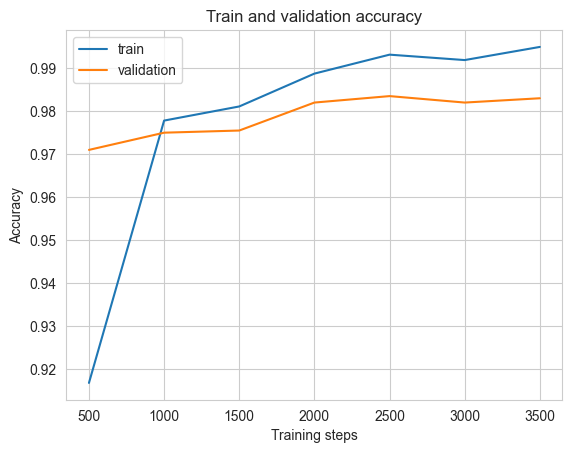

Validation accuracy: 0.983
Test accuracy: 0.979


In [29]:
steps = (np.arange(len(train_accuracies), dtype=int) + 1) * validation_every_steps

plt.figure()
plt.plot(steps, train_accuracies, label='train')
plt.plot(steps, valid_accuracies, label='validation')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train and validation accuracy")
plt.show()

# Evaluate test set
with torch.no_grad():
    model.eval()
    test_accuracies = []
    for inputs, targets in test_loader:
        output = model(inputs)
        loss = loss_fn(output, targets)

        predictions = output.max(1)[1]

        # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=True).
        test_accuracies.append(accuracy_score(targets, predictions) * len(inputs))

    test_accuracy = np.sum(test_accuracies) / len(x_test)
    print(f"Validation accuracy: {valid_accuracies[-1]:.3f}")
    print(f"Test accuracy: {test_accuracy:.3f}")
    
    model.train()


The test accuracy goes from 0.965 to 0.979 from just adding a 32 features and 5 kernel size 2D convolutional layer

2. Can the performance be increases even further by stacking more convolution layers?



Adding another Convolutional layer

In [30]:
class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        
        # Define the activation function (ReLU in this case) to use in the model layers
        activation_fn = nn.ReLU

        # Define the network architecture using nn.Sequential for a clean, layered model
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=channels, out_channels=32, kernel_size=5, stride=1, padding=1),  # 2D convolutional layer
            activation_fn(),  # Apply ReLU after convolutional layer
            # Adding another convolutional layer
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),  # 2D convolutional layer
            PrintSize(),  # Print the size after the convolutional layer
            nn.Flatten(),  # Flatten the input from (batch_size, channels, height, width) to (batch_size, channels * height * width)
            nn.Linear(32 * 26 * 26, 128),  # Adjusted fully connected layer with correct input size
            activation_fn(),  # Apply ReLU activation
            nn.Linear(128, 128),  # Another fully connected layer with 128 inputs and outputs
            activation_fn(),  # Apply ReLU activation again
            nn.Linear(128, num_classes)  # Output layer: maps 128 features to the number of classes (num_classes)
        )

    def forward(self, x):
        # Forward pass through the network
        return self.net(x)


In [31]:
batch_size = 64
num_epochs = 5
validation_every_steps = 500

step = 0
model.train()

train_accuracies = []
valid_accuracies = []


for epoch in range(num_epochs):
    
    train_accuracies_batches = []
    
    for inputs, targets in train_loader:
        
        # Forward pass.
        output = model(inputs)
        
        # Compute loss.
        loss = loss_fn(output, targets)
        
        # Clean up gradients from the model.
        optimizer.zero_grad()
        
        # Compute gradients based on the loss from the current batch (backpropagation).
        loss.backward()
        
        # Take one optimizer step using the gradients computed in the previous step.
        optimizer.step()
        
        step += 1
        
        # Compute accuracy.
        predictions = output.max(1)[1]
        train_accuracies_batches.append(accuracy_score(targets, predictions))
        
        if step % validation_every_steps == 0:
            
            # Append average training accuracy to list.
            train_accuracies.append(np.mean(train_accuracies_batches))
            
            train_accuracies_batches = []
        
            # Compute accuracies on validation set.
            valid_accuracies_batches = []
            with torch.no_grad():
                model.eval()
                for inputs, targets in valid_loader:
                    output = model(inputs)
                    loss = loss_fn(output, targets)

                    predictions = output.max(1)[1]

                    # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=False).
                    valid_accuracies_batches.append(accuracy_score(targets, predictions) * len(inputs))

                model.train()
                
            # Append average validation accuracy to list.
            valid_accuracies.append(np.sum(valid_accuracies_batches) / len(x_valid))
     
            print(f"Step {step:<5}   training accuracy: {train_accuracies[-1]}")
            print(f"             validation accuracy: {valid_accuracies[-1]}")

print("Finished training.")

Step 500     training accuracy: 0.9954375
             validation accuracy: 0.98
Step 1000    training accuracy: 0.9964326484018264
             validation accuracy: 0.982
Step 1500    training accuracy: 0.995625
             validation accuracy: 0.9825
Step 2000    training accuracy: 0.9976812214611872
             validation accuracy: 0.9835
Step 2500    training accuracy: 0.9986066878980892
             validation accuracy: 0.982
Step 3000    training accuracy: 0.99684375
             validation accuracy: 0.984
Step 3500    training accuracy: 0.9976728723404256
             validation accuracy: 0.9855
Finished training.


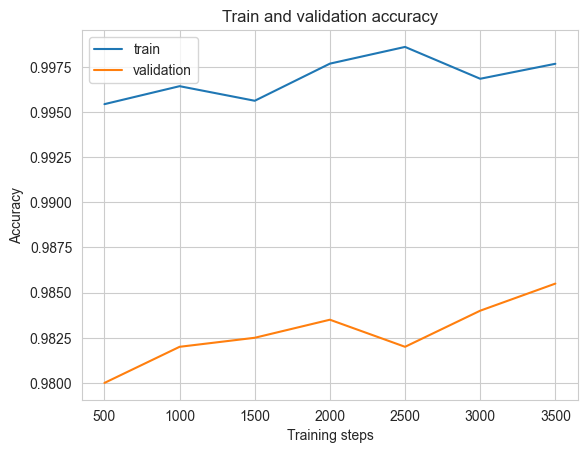

Validation accuracy: 0.986
Test accuracy: 0.976


In [34]:
steps = (np.arange(len(train_accuracies), dtype=int) + 1) * validation_every_steps

plt.figure()
plt.plot(steps, train_accuracies, label='train')
plt.plot(steps, valid_accuracies, label='validation')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train and validation accuracy")
plt.show()

# Evaluate test set
with torch.no_grad():
    model.eval()
    test_accuracies = []
    for inputs, targets in test_loader:
        output = model(inputs)
        loss = loss_fn(output, targets)

        predictions = output.max(1)[1]

        # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=True).
        test_accuracies.append(accuracy_score(targets, predictions) * len(inputs))

    test_accuracy = np.sum(test_accuracies) / len(x_test)
    print(f"Validation accuracy: {valid_accuracies[-1]:.3f}")
    print(f"Test accuracy: {test_accuracy:.3f}")
    
    model.train()


The Validation accuracy increases slightly but the test accuracy decreased slightly 

I conclude that merely adding another convolution is not the way to go. After having read the book I theorize I need a pooling layer before adding another convolution. 

3. We now have a deeper network than the initial simple feedforward network. What happens if we replace all convolutional layers with linear layers? Is this deep feedforward network performing as well as the convolutional one?
 


Replace all convolution with linear layers

In [36]:

class PrintSize(nn.Module):
    """Utility module to print the current shape of a Tensor in Sequential, only at the first forward pass."""
    
    first = True
    
    def forward(self, x):
        if self.first:
            print(f"Size: {x.size()}")
            self.first = False
        return x

class FullyConnectedModel(nn.Module):

    def __init__(self):
        super(FullyConnectedModel, self).__init__()
        
        # Define the activation function (ReLU in this case) to use in the model layers
        activation_fn = nn.ReLU
        
        # Calculate the number of input features by flattening the input size (assuming input shape is 28x28 for MNIST-like data)
        n_features = channels * height * width

        # Define the network architecture using nn.Sequential for a clean, layered model
        self.net = nn.Sequential(
            nn.Flatten(),  # Flatten the input from (batch_size, channels, height, width) to (batch_size, channels * height * width)
            PrintSize(),  # Print the size after flattening
            nn.Linear(n_features, 512),  # Fully connected layer with input size = flattened input, and output size = 512
            activation_fn(),  # Apply ReLU activation
            nn.Linear(512, 512),  # Another fully connected layer with 512 inputs and outputs
            activation_fn(),  # Apply ReLU activation
            nn.Linear(512, num_classes)  # Output layer: maps 512 features to the number of classes (num_classes)
        )

    def forward(self, x):
        # Forward pass through the network
        return self.net(x)

# Example usage
channels = 1  # For MNIST, we have a single channel (grayscale image)
height = 28  # Height of the MNIST images
width = 28  # Width of the MNIST images
num_classes = 10  # Number of classes in MNIST (digits 0-9)

# Create an instance of the fully connected model
model = FullyConnectedModel()
print(model)

# Define a dummy input (adjust to your actual input dimensions)
dummy_input = torch.randn(1, channels, height, width)  # Example input tensor (batch_size, channels, height, width)

# Forward pass through the model (this will print the tensor size after flattening)
output = model(dummy_input)

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


FullyConnectedModel(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): PrintSize()
    (2): Linear(in_features=784, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=10, bias=True)
  )
)
Size: torch.Size([1, 784])


Train and test the fully connected NN 

In [37]:
batch_size = 64
num_epochs = 5
validation_every_steps = 500

step = 0
model.train()

train_accuracies = []
valid_accuracies = []


for epoch in range(num_epochs):
    
    train_accuracies_batches = []
    
    for inputs, targets in train_loader:
        
        # Forward pass.
        output = model(inputs)
        
        # Compute loss.
        loss = loss_fn(output, targets)
        
        # Clean up gradients from the model.
        optimizer.zero_grad()
        
        # Compute gradients based on the loss from the current batch (backpropagation).
        loss.backward()
        
        # Take one optimizer step using the gradients computed in the previous step.
        optimizer.step()
        
        step += 1
        
        # Compute accuracy.
        predictions = output.max(1)[1]
        train_accuracies_batches.append(accuracy_score(targets, predictions))
        
        if step % validation_every_steps == 0:
            
            # Append average training accuracy to list.
            train_accuracies.append(np.mean(train_accuracies_batches))
            
            train_accuracies_batches = []
        
            # Compute accuracies on validation set.
            valid_accuracies_batches = []
            with torch.no_grad():
                model.eval()
                for inputs, targets in valid_loader:
                    output = model(inputs)
                    loss = loss_fn(output, targets)

                    predictions = output.max(1)[1]

                    # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=False).
                    valid_accuracies_batches.append(accuracy_score(targets, predictions) * len(inputs))

                model.train()
                
            # Append average validation accuracy to list.
            valid_accuracies.append(np.sum(valid_accuracies_batches) / len(x_valid))
     
            print(f"Step {step:<5}   training accuracy: {train_accuracies[-1]}")
            print(f"             validation accuracy: {valid_accuracies[-1]}")

print("Finished training.")

Step 500     training accuracy: 0.9065
             validation accuracy: 0.955
Step 1000    training accuracy: 0.9706763698630136
             validation accuracy: 0.967
Step 1500    training accuracy: 0.97228125
             validation accuracy: 0.9675
Step 2000    training accuracy: 0.9799514840182648
             validation accuracy: 0.9715
Step 2500    training accuracy: 0.9875597133757962
             validation accuracy: 0.974
Step 3000    training accuracy: 0.984375
             validation accuracy: 0.9755
Step 3500    training accuracy: 0.990982380319149
             validation accuracy: 0.9685
Finished training.


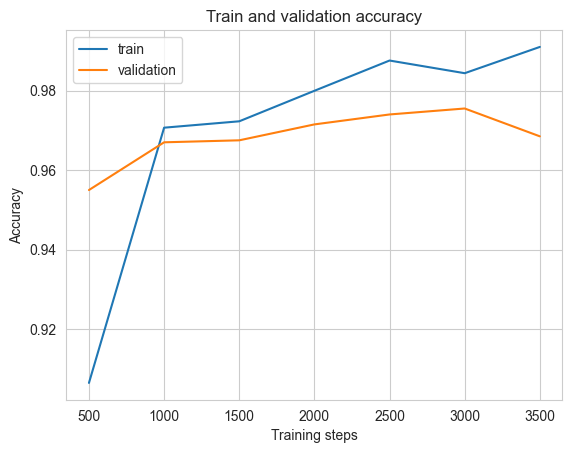

Validation accuracy: 0.969
Test accuracy: 0.974


In [38]:
steps = (np.arange(len(train_accuracies), dtype=int) + 1) * validation_every_steps

plt.figure()
plt.plot(steps, train_accuracies, label='train')
plt.plot(steps, valid_accuracies, label='validation')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train and validation accuracy")
plt.show()

# Evaluate test set
with torch.no_grad():
    model.eval()
    test_accuracies = []
    for inputs, targets in test_loader:
        output = model(inputs)
        loss = loss_fn(output, targets)

        predictions = output.max(1)[1]

        # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=True).
        test_accuracies.append(accuracy_score(targets, predictions) * len(inputs))

    test_accuracy = np.sum(test_accuracies) / len(x_test)
    print(f"Validation accuracy: {valid_accuracies[-1]:.3f}")
    print(f"Test accuracy: {test_accuracy:.3f}")
    
    model.train()


All though it does perform better than the simple Feedforward NN we defined first it is still not as good as any of the convolutional counterparts. 

4. Max-pooling is a technique for decreasing the spatial resolution of an image while retaining the important features. Effectively this gives a local translational invariance and reduces the computation by a factor of four. In the classification algorithm which is usually desirable. You can either: 
 
   - add a maxpool layer (see the PyTorch docs, and try with kernel_size=2 and stride=2) after the convolution layer, or
   - add stride=2 to the arguments of the convolution layer directly.
     
  Verify that this decreases the spatial dimension of the image (insert a `PrintSize` module in the `Sequential`). Does this increase the performance of the network? Note that, to increase performance, you may need to stack multiple layers, increase the number of filters, or tune the learning rate.



In [46]:
class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        
        # Define the activation function (ReLU in this case) to use in the model layers
        activation_fn = nn.ReLU

        # Define the network architecture using nn.Sequential for a clean, layered model
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=channels, out_channels=32, kernel_size=5, stride=1, padding=1),  # 2D convolutional layer
            activation_fn(),  # Apply ReLU after convolutional layer
            # Add a pooling layer with kernel size 2x2 and stride 2
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling layer
            PrintSize(),  # Print the size after the convolutional layer
            nn.Flatten(),  # Flatten the input from (batch_size, channels, height, width) to (batch_size, channels * height * width)
            nn.Linear(32 * 13 * 13, 128),  # Adjusted fully connected layer with correct input size
            activation_fn(),  # Apply ReLU activation
            nn.Linear(128, 128),  # Another fully connected layer with 128 inputs and outputs
            activation_fn(),  # Apply ReLU activation again
            nn.Linear(128, num_classes)  # Output layer: maps 128 features to the number of classes (num_classes)
        )

    def forward(self, x):
        # Forward pass through the network
        return self.net(x)

# Example usage
model = Model()
print(model)

# Define dummy input (adjust to your actual input dimensions)
dummy_input = torch.randn(1, channels, height, width)  # Example input tensor (batch_size, channels, height, width)

# Print size of the input tensor
print(f"Input size: {dummy_input.size()}")

# Forward pass through the model (this will print the tensor size after the convolution)
output = model(dummy_input)

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


Model(
  (net): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): PrintSize()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=5408, out_features=128, bias=True)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=10, bias=True)
  )
)
Input size: torch.Size([1, 1, 28, 28])
Size: torch.Size([1, 32, 13, 13])


Testing 

In [47]:
batch_size = 64
num_epochs = 5
validation_every_steps = 500

step = 0
model.train()

train_accuracies = []
valid_accuracies = []


for epoch in range(num_epochs):
    
    train_accuracies_batches = []
    
    for inputs, targets in train_loader:
        
        # Forward pass.
        output = model(inputs)
        
        # Compute loss.
        loss = loss_fn(output, targets)
        
        # Clean up gradients from the model.
        optimizer.zero_grad()
        
        # Compute gradients based on the loss from the current batch (backpropagation).
        loss.backward()
        
        # Take one optimizer step using the gradients computed in the previous step.
        optimizer.step()
        
        step += 1
        
        # Compute accuracy.
        predictions = output.max(1)[1]
        train_accuracies_batches.append(accuracy_score(targets, predictions))
        
        if step % validation_every_steps == 0:
            
            # Append average training accuracy to list.
            train_accuracies.append(np.mean(train_accuracies_batches))
            
            train_accuracies_batches = []
        
            # Compute accuracies on validation set.
            valid_accuracies_batches = []
            with torch.no_grad():
                model.eval()
                for inputs, targets in valid_loader:
                    output = model(inputs)
                    loss = loss_fn(output, targets)

                    predictions = output.max(1)[1]

                    # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=False).
                    valid_accuracies_batches.append(accuracy_score(targets, predictions) * len(inputs))

                model.train()
                
            # Append average validation accuracy to list.
            valid_accuracies.append(np.sum(valid_accuracies_batches) / len(x_valid))
     
            print(f"Step {step:<5}   training accuracy: {train_accuracies[-1]}")
            print(f"             validation accuracy: {valid_accuracies[-1]}")

print("Finished training.")

Step 500     training accuracy: 0.91284375
             validation accuracy: 0.9685
Step 1000    training accuracy: 0.9789526255707762
             validation accuracy: 0.9725
Step 1500    training accuracy: 0.9820625
             validation accuracy: 0.981
Step 2000    training accuracy: 0.9872288812785388
             validation accuracy: 0.976
Step 2500    training accuracy: 0.9915406050955414
             validation accuracy: 0.9815
Step 3000    training accuracy: 0.99065625
             validation accuracy: 0.9815
Step 3500    training accuracy: 0.9927692819148937
             validation accuracy: 0.984
Finished training.


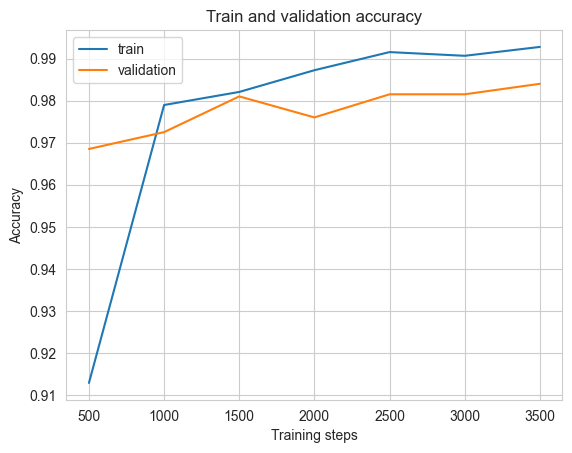

Validation accuracy: 0.984
Test accuracy: 0.979


In [48]:
steps = (np.arange(len(train_accuracies), dtype=int) + 1) * validation_every_steps

plt.figure()
plt.plot(steps, train_accuracies, label='train')
plt.plot(steps, valid_accuracies, label='validation')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train and validation accuracy")
plt.show()

# Evaluate test set
with torch.no_grad():
    model.eval()
    test_accuracies = []
    for inputs, targets in test_loader:
        output = model(inputs)
        loss = loss_fn(output, targets)

        predictions = output.max(1)[1]

        # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=True).
        test_accuracies.append(accuracy_score(targets, predictions) * len(inputs))

    test_accuracy = np.sum(test_accuracies) / len(x_test)
    print(f"Validation accuracy: {valid_accuracies[-1]:.3f}")
    print(f"Test accuracy: {test_accuracy:.3f}")
    
    model.train()


Just adding the pooling layer does not seem to make it more accurate as the test accuracy is identical. 

Adding another convolutional layer with a pooling after

In [50]:
class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        
        # Define the activation function (ReLU in this case) to use in the model layers
        activation_fn = nn.ReLU

        # Define the network architecture using nn.Sequential for a clean, layered model
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=channels, out_channels=32, kernel_size=5, stride=1, padding=1),  # 2D convolutional layer
            activation_fn(),  # Apply ReLU after convolutional layer
            # Add a pooling layer with kernel size 2x2 and stride 2
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling layer
            # Adding another convolutional layer
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),  # 2D convolutional layer
            # Add a pooling layer with kernel size 2x2 and stride 2
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling layer
            PrintSize(),  # Print the size after the convolutional layer
            nn.Flatten(),  # Flatten the input from (batch_size, channels, height, width) to (batch_size, channels * height * width)
            # Adjusted fully connected layer with correct input size
            nn.Linear(64 * 6 * 6, 128),  # Adjusted fully connected layer with correct input size
            activation_fn(),  # Apply ReLU activation
            nn.Linear(128, 128),  # Another fully connected layer with 128 inputs and outputs
            activation_fn(),  # Apply ReLU activation again
            nn.Linear(128, num_classes)  # Output layer: maps 128 features to the number of classes (num_classes)
        )

    def forward(self, x):
        # Forward pass through the network
        return self.net(x)

# Example usage
model = Model()
print(model)

# Define dummy input (adjust to your actual input dimensions)
dummy_input = torch.randn(1, channels, height, width)  # Example input tensor (batch_size, channels, height, width)

# Print size of the input tensor
print(f"Input size: {dummy_input.size()}")

# Forward pass through the model (this will print the tensor size after the convolution)
output = model(dummy_input)

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


Model(
  (net): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): PrintSize()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=2304, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=10, bias=True)
  )
)
Input size: torch.Size([1, 1, 28, 28])
Size: torch.Size([1, 64, 6, 6])


In [51]:
batch_size = 64
num_epochs = 5
validation_every_steps = 500

step = 0
model.train()

train_accuracies = []
valid_accuracies = []


for epoch in range(num_epochs):
    
    train_accuracies_batches = []
    
    for inputs, targets in train_loader:
        
        # Forward pass.
        output = model(inputs)
        
        # Compute loss.
        loss = loss_fn(output, targets)
        
        # Clean up gradients from the model.
        optimizer.zero_grad()
        
        # Compute gradients based on the loss from the current batch (backpropagation).
        loss.backward()
        
        # Take one optimizer step using the gradients computed in the previous step.
        optimizer.step()
        
        step += 1
        
        # Compute accuracy.
        predictions = output.max(1)[1]
        train_accuracies_batches.append(accuracy_score(targets, predictions))
        
        if step % validation_every_steps == 0:
            
            # Append average training accuracy to list.
            train_accuracies.append(np.mean(train_accuracies_batches))
            
            train_accuracies_batches = []
        
            # Compute accuracies on validation set.
            valid_accuracies_batches = []
            with torch.no_grad():
                model.eval()
                for inputs, targets in valid_loader:
                    output = model(inputs)
                    loss = loss_fn(output, targets)

                    predictions = output.max(1)[1]

                    # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=False).
                    valid_accuracies_batches.append(accuracy_score(targets, predictions) * len(inputs))

                model.train()
                
            # Append average validation accuracy to list.
            valid_accuracies.append(np.sum(valid_accuracies_batches) / len(x_valid))
     
            print(f"Step {step:<5}   training accuracy: {train_accuracies[-1]}")
            print(f"             validation accuracy: {valid_accuracies[-1]}")

print("Finished training.")

Step 500     training accuracy: 0.91053125
             validation accuracy: 0.967
Step 1000    training accuracy: 0.9790239726027398
             validation accuracy: 0.969
Step 1500    training accuracy: 0.98225
             validation accuracy: 0.9825
Step 2000    training accuracy: 0.9877639840182648
             validation accuracy: 0.983
Step 2500    training accuracy: 0.9907444267515924
             validation accuracy: 0.986
Step 3000    training accuracy: 0.9903125
             validation accuracy: 0.984
Step 3500    training accuracy: 0.9933095079787234
             validation accuracy: 0.9865
Finished training.


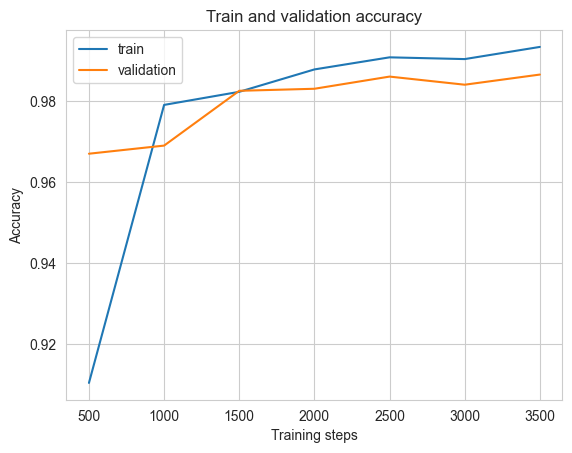

Validation accuracy: 0.987
Test accuracy: 0.983


In [52]:
steps = (np.arange(len(train_accuracies), dtype=int) + 1) * validation_every_steps

plt.figure()
plt.plot(steps, train_accuracies, label='train')
plt.plot(steps, valid_accuracies, label='validation')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train and validation accuracy")
plt.show()

# Evaluate test set
with torch.no_grad():
    model.eval()
    test_accuracies = []
    for inputs, targets in test_loader:
        output = model(inputs)
        loss = loss_fn(output, targets)

        predictions = output.max(1)[1]

        # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=True).
        test_accuracies.append(accuracy_score(targets, predictions) * len(inputs))

    test_accuracy = np.sum(test_accuracies) / len(x_test)
    print(f"Validation accuracy: {valid_accuracies[-1]:.3f}")
    print(f"Test accuracy: {test_accuracy:.3f}")
    
    model.train()


Adding another convolutional layer with pooling does indeed make it perform better as the test accuracy is now 0.983 instead of 0.979

5. Dropout is a very useful technique for preventing overfitting. Try to add a DropoutLayer after some of the convolution layers. You may observe a higher validation accuracy but lower train accuracy. Can you explain why this might be the case?
 


I add a dropout layer after each convolutional layer

In [54]:
class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        
        # Define the activation function (ReLU in this case) to use in the model layers
        activation_fn = nn.ReLU

        # Define the network architecture using nn.Sequential for a clean, layered model
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=channels, out_channels=32, kernel_size=5, stride=1, padding=1),  # 2D convolutional layer
            activation_fn(),  # Apply ReLU after convolutional layer
            # Add a pooling layer with kernel size 2x2 and stride 2
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling layer
            # Add dropout layer with a probability of 0.25
            nn.Dropout2d(p=0.25),  # Dropout layer
            # Adding another convolutional layer
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),  # 2D convolutional layer
            # Add a pooling layer with kernel size 2x2 and stride 2
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling layer
            # Add dropout layer with a probability of 0.25
            nn.Dropout2d(p=0.25),  # Dropout layer
            PrintSize(),  # Print the size after the convolutional layer
            nn.Flatten(),  # Flatten the input from (batch_size, channels, height, width) to (batch_size, channels * height * width)
            # Adjusted fully connected layer with correct input size
            nn.Linear(64 * 6 * 6, 128),  # Adjusted fully connected layer with correct input size
            activation_fn(),  # Apply ReLU activation
            nn.Linear(128, 128),  # Another fully connected layer with 128 inputs and outputs
            activation_fn(),  # Apply ReLU activation again
            nn.Linear(128, num_classes)  # Output layer: maps 128 features to the number of classes (num_classes)
        )

    def forward(self, x):
        # Forward pass through the network
        return self.net(x)

# Example usage
model = Model()
print(model)

# Define dummy input (adjust to your actual input dimensions)
dummy_input = torch.randn(1, channels, height, width)  # Example input tensor (batch_size, channels, height, width)

# Print size of the input tensor
print(f"Input size: {dummy_input.size()}")

# Forward pass through the model (this will print the tensor size after the convolution)
output = model(dummy_input)

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


Model(
  (net): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout2d(p=0.25, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Dropout2d(p=0.25, inplace=False)
    (7): PrintSize()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=2304, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=128, bias=True)
    (12): ReLU()
    (13): Linear(in_features=128, out_features=10, bias=True)
  )
)
Input size: torch.Size([1, 1, 28, 28])
Size: torch.Size([1, 64, 6, 6])


In [55]:
batch_size = 64
num_epochs = 5
validation_every_steps = 500

step = 0
model.train()

train_accuracies = []
valid_accuracies = []


for epoch in range(num_epochs):
    
    train_accuracies_batches = []
    
    for inputs, targets in train_loader:
        
        # Forward pass.
        output = model(inputs)
        
        # Compute loss.
        loss = loss_fn(output, targets)
        
        # Clean up gradients from the model.
        optimizer.zero_grad()
        
        # Compute gradients based on the loss from the current batch (backpropagation).
        loss.backward()
        
        # Take one optimizer step using the gradients computed in the previous step.
        optimizer.step()
        
        step += 1
        
        # Compute accuracy.
        predictions = output.max(1)[1]
        train_accuracies_batches.append(accuracy_score(targets, predictions))
        
        if step % validation_every_steps == 0:
            
            # Append average training accuracy to list.
            train_accuracies.append(np.mean(train_accuracies_batches))
            
            train_accuracies_batches = []
        
            # Compute accuracies on validation set.
            valid_accuracies_batches = []
            with torch.no_grad():
                model.eval()
                for inputs, targets in valid_loader:
                    output = model(inputs)
                    loss = loss_fn(output, targets)

                    predictions = output.max(1)[1]

                    # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=False).
                    valid_accuracies_batches.append(accuracy_score(targets, predictions) * len(inputs))

                model.train()
                
            # Append average validation accuracy to list.
            valid_accuracies.append(np.sum(valid_accuracies_batches) / len(x_valid))
     
            print(f"Step {step:<5}   training accuracy: {train_accuracies[-1]}")
            print(f"             validation accuracy: {valid_accuracies[-1]}")

print("Finished training.")

Step 500     training accuracy: 0.89659375
             validation accuracy: 0.9685
Step 1000    training accuracy: 0.9724600456621004
             validation accuracy: 0.9745
Step 1500    training accuracy: 0.97678125
             validation accuracy: 0.983
Step 2000    training accuracy: 0.9820562214611872
             validation accuracy: 0.984
Step 2500    training accuracy: 0.9850716560509554
             validation accuracy: 0.987
Step 3000    training accuracy: 0.98559375
             validation accuracy: 0.9805
Step 3500    training accuracy: 0.9885721409574468
             validation accuracy: 0.9875
Finished training.


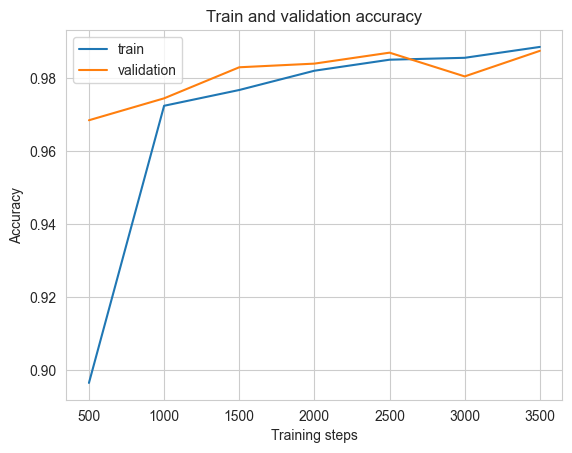

Validation accuracy: 0.988
Test accuracy: 0.987


In [56]:
steps = (np.arange(len(train_accuracies), dtype=int) + 1) * validation_every_steps

plt.figure()
plt.plot(steps, train_accuracies, label='train')
plt.plot(steps, valid_accuracies, label='validation')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train and validation accuracy")
plt.show()

# Evaluate test set
with torch.no_grad():
    model.eval()
    test_accuracies = []
    for inputs, targets in test_loader:
        output = model(inputs)
        loss = loss_fn(output, targets)

        predictions = output.max(1)[1]

        # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=True).
        test_accuracies.append(accuracy_score(targets, predictions) * len(inputs))

    test_accuracy = np.sum(test_accuracies) / len(x_test)
    print(f"Validation accuracy: {valid_accuracies[-1]:.3f}")
    print(f"Test accuracy: {test_accuracy:.3f}")
    
    model.train()


In comparison to the network without dropout, I observed a slight decrease in training accuracy, while the validation accuracy improved slightly. Additionally, the overall performance of the network increased, with the test accuracy rising from **0.983** to **0.987**.

The reason for this improvement lies in the role of the **dropout layer** as a regularization technique. Dropout works by randomly setting approximately 25% of the neurons (or weights) to zero during each training iteration. This prevents the model from relying too heavily on specific neurons or overfitting to the training data. By introducing this randomness, dropout forces the network to learn more robust and generalized features that are not tied to specific patterns in the training set.

As a result, while the **training accuracy** may decrease slightly due to this imposed noise, the model’s ability to generalize to unseen data improves. This is reflected in the increased validation and test accuracy, as the network is now less prone to overfitting and better equipped to handle new data.


6. Batch normalization may help convergence in larger networks as well as generalization performance. Try to insert batch normalization layers into the network.

Finally I add batch normalization into the network

In [79]:
class PrintSize(nn.Module):
    """Utility module to print current shape of a Tensor in Sequential, only at the first forward pass."""
    first = True
    def forward(self, x):
        if self.first:
            print(f"Size: {x.size()}")
            self.first = False
        return x

class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        
        # Define the activation function (ReLU in this case) to use in the model layers
        activation_fn = nn.ReLU

        # Define the network architecture using nn.Sequential for a clean, layered model
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=channels, out_channels=32, kernel_size=5, stride=1, padding=1),  # 2D convolutional layer
            nn.BatchNorm2d(32),  # Add batch normalization after convolutional layer
            activation_fn(),  # Apply ReLU after batch normalization
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling layer
            nn.Dropout2d(p=0.25),  # Dropout layer

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),  # 2D convolutional layer
            nn.BatchNorm2d(64),  # Add batch normalization after convolutional layer
            activation_fn(),  # Apply ReLU after batch normalization
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling layer
            nn.Dropout2d(p=0.25),  # Dropout layer

            PrintSize(),  # Print the size after the convolutional layer
            nn.Flatten(),  # Flatten the input from (batch_size, channels, height, width) to (batch_size, channels * height * width)

            # Fully connected layers
            nn.Linear(64 * 6 * 6, 128),  # Fully connected layer
            nn.BatchNorm1d(128),  # Add batch normalization after fully connected layer
            activation_fn(),  # Apply ReLU activation
            nn.Dropout(p=0.5),  # Dropout layer

            nn.Linear(128, 128),  # Another fully connected layer
            nn.BatchNorm1d(128),  # Add batch normalization after fully connected layer
            activation_fn(),  # Apply ReLU activation
            nn.Dropout(p=0.5),  # Dropout layer

            nn.Linear(128, num_classes)  # Output layer
        )



    def forward(self, x):
        # Forward pass through the network
        return self.net(x)
    
    
# Example usage
model = Model()
print(model)


# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

Model(
  (net): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.25, inplace=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout2d(p=0.25, inplace=False)
    (10): PrintSize()
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=2304, out_features=128, bias=True)
    (13): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=128, out_features=128, bias=True)
    (17): BatchNorm1d

In [80]:
batch_size = 64
num_epochs = 5
validation_every_steps = 500

step = 0
model.train()

train_accuracies = []
valid_accuracies = []


for epoch in range(num_epochs):
    
    train_accuracies_batches = []
    
    for inputs, targets in train_loader:
        
        # Forward pass.
        output = model(inputs)
        
        # Compute loss.
        loss = loss_fn(output, targets)
        
        # Clean up gradients from the model.
        optimizer.zero_grad()
        
        # Compute gradients based on the loss from the current batch (backpropagation).
        loss.backward()
        
        # Take one optimizer step using the gradients computed in the previous step.
        optimizer.step()
        
        step += 1
        
        # Compute accuracy.
        predictions = output.max(1)[1]
        train_accuracies_batches.append(accuracy_score(targets, predictions))
        
        if step % validation_every_steps == 0:
            
            # Append average training accuracy to list.
            train_accuracies.append(np.mean(train_accuracies_batches))
            
            train_accuracies_batches = []
        
            # Compute accuracies on validation set.
            valid_accuracies_batches = []
            with torch.no_grad():
                model.eval()
                for inputs, targets in valid_loader:
                    output = model(inputs)
                    loss = loss_fn(output, targets)

                    predictions = output.max(1)[1]

                    # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=False).
                    valid_accuracies_batches.append(accuracy_score(targets, predictions) * len(inputs))

                model.train()
                
            # Append average validation accuracy to list.
            valid_accuracies.append(np.sum(valid_accuracies_batches) / len(x_valid))
     
            print(f"Step {step:<5}   training accuracy: {train_accuracies[-1]}")
            print(f"             validation accuracy: {valid_accuracies[-1]}")

print("Finished training.")

Size: torch.Size([64, 64, 6, 6])
Step 500     training accuracy: 0.86796875
             validation accuracy: 0.976
Step 1000    training accuracy: 0.9534103881278538
             validation accuracy: 0.9855
Step 1500    training accuracy: 0.95884375
             validation accuracy: 0.9825
Step 2000    training accuracy: 0.9673230593607306
             validation accuracy: 0.984
Step 2500    training accuracy: 0.9729299363057324
             validation accuracy: 0.9905
Step 3000    training accuracy: 0.97146875
             validation accuracy: 0.9885
Step 3500    training accuracy: 0.9720329122340425
             validation accuracy: 0.9885
Finished training.


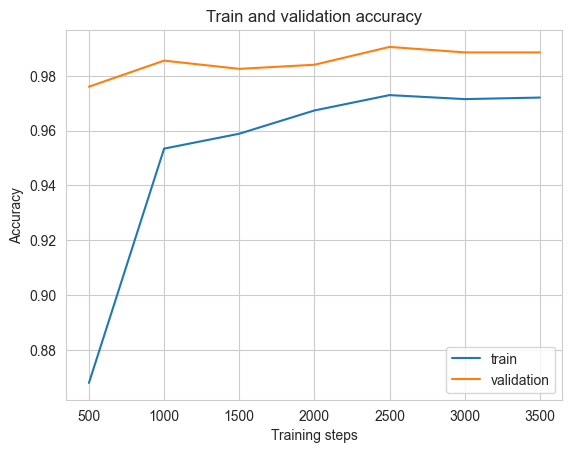

Validation accuracy: 0.989
Test accuracy: 0.986


In [81]:
steps = (np.arange(len(train_accuracies), dtype=int) + 1) * validation_every_steps

plt.figure()
plt.plot(steps, train_accuracies, label='train')
plt.plot(steps, valid_accuracies, label='validation')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train and validation accuracy")
plt.show()

# Evaluate test set
with torch.no_grad():
    model.eval()
    test_accuracies = []
    for inputs, targets in test_loader:
        output = model(inputs)
        loss = loss_fn(output, targets)

        predictions = output.max(1)[1]

        # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=True).
        test_accuracies.append(accuracy_score(targets, predictions) * len(inputs))

    test_accuracy = np.sum(test_accuracies) / len(x_test)
    print(f"Validation accuracy: {valid_accuracies[-1]:.3f}")
    print(f"Test accuracy: {test_accuracy:.3f}")
    
    model.train()


Adding Batchnormalization alone actually decreased the test accuracy of the network and it seems that has trouble converging. Looking into this I found out that this often happens with batchnormalization and one trick to fix it is to lower the learning rate. 

Thus I try with 1e-4

In [82]:
class PrintSize(nn.Module):
    """Utility module to print current shape of a Tensor in Sequential, only at the first forward pass."""
    first = True
    def forward(self, x):
        if self.first:
            print(f"Size: {x.size()}")
            self.first = False
        return x

class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        
        # Define the activation function (ReLU in this case) to use in the model layers
        activation_fn = nn.ReLU

        # Define the network architecture using nn.Sequential for a clean, layered model
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=channels, out_channels=32, kernel_size=5, stride=1, padding=1),  # 2D convolutional layer
            nn.BatchNorm2d(32),  # Add batch normalization after convolutional layer
            activation_fn(),  # Apply ReLU after batch normalization
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling layer
            nn.Dropout2d(p=0.25),  # Dropout layer

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),  # 2D convolutional layer
            nn.BatchNorm2d(64),  # Add batch normalization after convolutional layer
            activation_fn(),  # Apply ReLU after batch normalization
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling layer
            nn.Dropout2d(p=0.25),  # Dropout layer

            PrintSize(),  # Print the size after the convolutional layer
            nn.Flatten(),  # Flatten the input from (batch_size, channels, height, width) to (batch_size, channels * height * width)

            # Fully connected layers
            nn.Linear(64 * 6 * 6, 128),  # Fully connected layer
            nn.BatchNorm1d(128),  # Add batch normalization after fully connected layer
            activation_fn(),  # Apply ReLU activation
            nn.Dropout(p=0.5),  # Dropout layer

            nn.Linear(128, 128),  # Another fully connected layer
            nn.BatchNorm1d(128),  # Add batch normalization after fully connected layer
            activation_fn(),  # Apply ReLU activation
            nn.Dropout(p=0.5),  # Dropout layer

            nn.Linear(128, num_classes)  # Output layer
        )

    def forward(self, x):
        # Forward pass through the network
        return self.net(x)

# Example usage
model = Model()

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [83]:
batch_size = 64
num_epochs = 5
validation_every_steps = 500

step = 0
model.train()

train_accuracies = []
valid_accuracies = []


for epoch in range(num_epochs):
    
    train_accuracies_batches = []
    
    for inputs, targets in train_loader:
        
        # Forward pass.
        output = model(inputs)
        
        # Compute loss.
        loss = loss_fn(output, targets)
        
        # Clean up gradients from the model.
        optimizer.zero_grad()
        
        # Compute gradients based on the loss from the current batch (backpropagation).
        loss.backward()
        
        # Take one optimizer step using the gradients computed in the previous step.
        optimizer.step()
        
        step += 1
        
        # Compute accuracy.
        predictions = output.max(1)[1]
        train_accuracies_batches.append(accuracy_score(targets, predictions))
        
        if step % validation_every_steps == 0:
            
            # Append average training accuracy to list.
            train_accuracies.append(np.mean(train_accuracies_batches))
            
            train_accuracies_batches = []
        
            # Compute accuracies on validation set.
            valid_accuracies_batches = []
            with torch.no_grad():
                model.eval()
                for inputs, targets in valid_loader:
                    output = model(inputs)
                    loss = loss_fn(output, targets)

                    predictions = output.max(1)[1]

                    # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=False).
                    valid_accuracies_batches.append(accuracy_score(targets, predictions) * len(inputs))

                model.train()
                
            # Append average validation accuracy to list.
            valid_accuracies.append(np.sum(valid_accuracies_batches) / len(x_valid))
     
            print(f"Step {step:<5}   training accuracy: {train_accuracies[-1]}")
            print(f"             validation accuracy: {valid_accuracies[-1]}")

print("Finished training.")

Size: torch.Size([64, 64, 6, 6])
Step 500     training accuracy: 0.62828125
             validation accuracy: 0.923
Step 1000    training accuracy: 0.896689497716895
             validation accuracy: 0.9625
Step 1500    training accuracy: 0.918875
             validation accuracy: 0.9745
Step 2000    training accuracy: 0.9391409817351598
             validation accuracy: 0.9775
Step 2500    training accuracy: 0.9553144904458599
             validation accuracy: 0.9805
Step 3000    training accuracy: 0.95153125
             validation accuracy: 0.9835
Step 3500    training accuracy: 0.9581948138297872
             validation accuracy: 0.9835
Finished training.


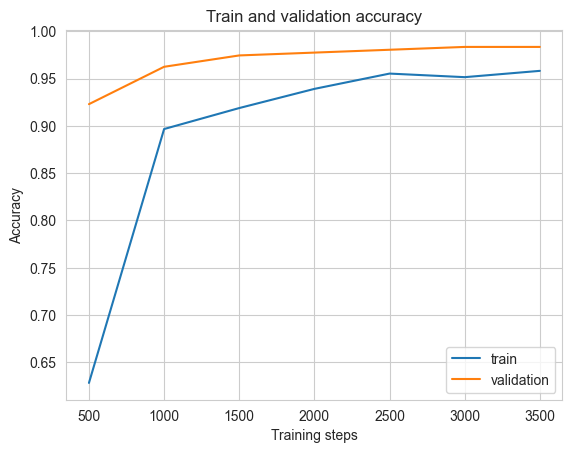

Validation accuracy: 0.984
Test accuracy: 0.978


In [84]:
steps = (np.arange(len(train_accuracies), dtype=int) + 1) * validation_every_steps

plt.figure()
plt.plot(steps, train_accuracies, label='train')
plt.plot(steps, valid_accuracies, label='validation')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train and validation accuracy")
plt.show()

# Evaluate test set
with torch.no_grad():
    model.eval()
    test_accuracies = []
    for inputs, targets in test_loader:
        output = model(inputs)
        loss = loss_fn(output, targets)

        predictions = output.max(1)[1]

        # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=True).
        test_accuracies.append(accuracy_score(targets, predictions) * len(inputs))

    test_accuracy = np.sum(test_accuracies) / len(x_test)
    print(f"Validation accuracy: {valid_accuracies[-1]:.3f}")
    print(f"Test accuracy: {test_accuracy:.3f}")
    
    model.train()


This did not work. I try by reducing the dropout between the convolutional layers to 0.1

In [86]:
class PrintSize(nn.Module):
    """Utility module to print current shape of a Tensor in Sequential, only at the first forward pass."""
    first = True
    def forward(self, x):
        if self.first:
            print(f"Size: {x.size()}")
            self.first = False
        return x

class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        
        # Define the activation function (ReLU in this case) to use in the model layers
        activation_fn = nn.ReLU

        # Define the network architecture using nn.Sequential for a clean, layered model
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=channels, out_channels=32, kernel_size=5, stride=1, padding=1),  # 2D convolutional layer
            nn.BatchNorm2d(32),  # Add batch normalization after convolutional layer
            activation_fn(),  # Apply ReLU after batch normalization
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling layer
            nn.Dropout2d(p=0.1),  # Dropout layer

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),  # 2D convolutional layer
            nn.BatchNorm2d(64),  # Add batch normalization after convolutional layer
            activation_fn(),  # Apply ReLU after batch normalization
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling layer
            nn.Dropout2d(p=0.1),  # Dropout layer

            PrintSize(),  # Print the size after the convolutional layer
            nn.Flatten(),  # Flatten the input from (batch_size, channels, height, width) to (batch_size, channels * height * width)

            # Fully connected layers
            nn.Linear(64 * 6 * 6, 128),  # Fully connected layer
            nn.BatchNorm1d(128),  # Add batch normalization after fully connected layer
            activation_fn(),  # Apply ReLU activation
            nn.Dropout(p=0.5),  # Dropout layer

            nn.Linear(128, 128),  # Another fully connected layer
            nn.BatchNorm1d(128),  # Add batch normalization after fully connected layer
            activation_fn(),  # Apply ReLU activation
            nn.Dropout(p=0.5),  # Dropout layer

            nn.Linear(128, num_classes)  # Output layer
        )

    def forward(self, x):
        # Forward pass through the network
        return self.net(x)

# Example usage
model = Model()

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [87]:
batch_size = 64
num_epochs = 5
validation_every_steps = 500

step = 0
model.train()

train_accuracies = []
valid_accuracies = []


for epoch in range(num_epochs):
    
    train_accuracies_batches = []
    
    for inputs, targets in train_loader:
        
        # Forward pass.
        output = model(inputs)
        
        # Compute loss.
        loss = loss_fn(output, targets)
        
        # Clean up gradients from the model.
        optimizer.zero_grad()
        
        # Compute gradients based on the loss from the current batch (backpropagation).
        loss.backward()
        
        # Take one optimizer step using the gradients computed in the previous step.
        optimizer.step()
        
        step += 1
        
        # Compute accuracy.
        predictions = output.max(1)[1]
        train_accuracies_batches.append(accuracy_score(targets, predictions))
        
        if step % validation_every_steps == 0:
            
            # Append average training accuracy to list.
            train_accuracies.append(np.mean(train_accuracies_batches))
            
            train_accuracies_batches = []
        
            # Compute accuracies on validation set.
            valid_accuracies_batches = []
            with torch.no_grad():
                model.eval()
                for inputs, targets in valid_loader:
                    output = model(inputs)
                    loss = loss_fn(output, targets)

                    predictions = output.max(1)[1]

                    # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=False).
                    valid_accuracies_batches.append(accuracy_score(targets, predictions) * len(inputs))

                model.train()
                
            # Append average validation accuracy to list.
            valid_accuracies.append(np.sum(valid_accuracies_batches) / len(x_valid))
     
            print(f"Step {step:<5}   training accuracy: {train_accuracies[-1]}")
            print(f"             validation accuracy: {valid_accuracies[-1]}")

print("Finished training.")

Size: torch.Size([64, 64, 6, 6])
Step 500     training accuracy: 0.89815625
             validation accuracy: 0.9805
Step 1000    training accuracy: 0.962828196347032
             validation accuracy: 0.984
Step 1500    training accuracy: 0.96903125
             validation accuracy: 0.9895
Step 2000    training accuracy: 0.9720676369863014
             validation accuracy: 0.9875
Step 2500    training accuracy: 0.9776074840764332
             validation accuracy: 0.991
Step 3000    training accuracy: 0.9785
             validation accuracy: 0.988
Step 3500    training accuracy: 0.9787234042553191
             validation accuracy: 0.9905
Finished training.


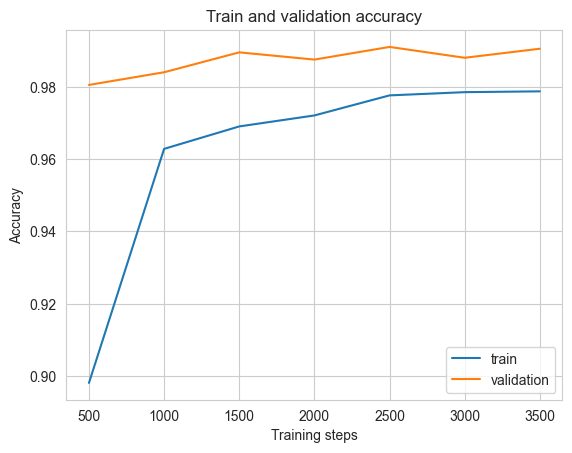

Validation accuracy: 0.991
Test accuracy: 0.988


In [88]:
steps = (np.arange(len(train_accuracies), dtype=int) + 1) * validation_every_steps

plt.figure()
plt.plot(steps, train_accuracies, label='train')
plt.plot(steps, valid_accuracies, label='validation')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train and validation accuracy")
plt.show()

# Evaluate test set
with torch.no_grad():
    model.eval()
    test_accuracies = []
    for inputs, targets in test_loader:
        output = model(inputs)
        loss = loss_fn(output, targets)

        predictions = output.max(1)[1]

        # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=True).
        test_accuracies.append(accuracy_score(targets, predictions) * len(inputs))

    test_accuracy = np.sum(test_accuracies) / len(x_test)
    print(f"Validation accuracy: {valid_accuracies[-1]:.3f}")
    print(f"Test accuracy: {test_accuracy:.3f}")
    
    model.train()


This did indeed increase the performance of the network from 0.987 with dropout = 0.5 only and now to 0.988 with dropout = 0.1 and batchnormalization. 

I try with no dropout. In theory since we are working with a limited dataset only some regularization is needed. Thus resorting to convolution and batchnormalization alone might do the trick just fine 

In [89]:
class PrintSize(nn.Module):
    """Utility module to print current shape of a Tensor in Sequential, only at the first forward pass."""
    first = True
    def forward(self, x):
        if self.first:
            print(f"Size: {x.size()}")
            self.first = False
        return x

class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        
        # Define the activation function (ReLU in this case) to use in the model layers
        activation_fn = nn.ReLU

        # Define the network architecture using nn.Sequential for a clean, layered model
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=channels, out_channels=32, kernel_size=5, stride=1, padding=1),  # 2D convolutional layer
            nn.BatchNorm2d(32),  # Add batch normalization after convolutional layer
            activation_fn(),  # Apply ReLU after batch normalization
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling layer
            nn.Dropout2d(p=0),  # Dropout layer

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),  # 2D convolutional layer
            nn.BatchNorm2d(64),  # Add batch normalization after convolutional layer
            activation_fn(),  # Apply ReLU after batch normalization
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling layer
            nn.Dropout2d(p=0),  # Dropout layer

            PrintSize(),  # Print the size after the convolutional layer
            nn.Flatten(),  # Flatten the input from (batch_size, channels, height, width) to (batch_size, channels * height * width)

            # Fully connected layers
            nn.Linear(64 * 6 * 6, 128),  # Fully connected layer
            nn.BatchNorm1d(128),  # Add batch normalization after fully connected layer
            activation_fn(),  # Apply ReLU activation
            nn.Dropout(p=0.5),  # Dropout layer

            nn.Linear(128, 128),  # Another fully connected layer
            nn.BatchNorm1d(128),  # Add batch normalization after fully connected layer
            activation_fn(),  # Apply ReLU activation
            nn.Dropout(p=0.5),  # Dropout layer

            nn.Linear(128, num_classes)  # Output layer
        )

    def forward(self, x):
        # Forward pass through the network
        return self.net(x)

# Example usage
model = Model()

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [90]:
batch_size = 64
num_epochs = 5
validation_every_steps = 500

step = 0
model.train()

train_accuracies = []
valid_accuracies = []


for epoch in range(num_epochs):
    
    train_accuracies_batches = []
    
    for inputs, targets in train_loader:
        
        # Forward pass.
        output = model(inputs)
        
        # Compute loss.
        loss = loss_fn(output, targets)
        
        # Clean up gradients from the model.
        optimizer.zero_grad()
        
        # Compute gradients based on the loss from the current batch (backpropagation).
        loss.backward()
        
        # Take one optimizer step using the gradients computed in the previous step.
        optimizer.step()
        
        step += 1
        
        # Compute accuracy.
        predictions = output.max(1)[1]
        train_accuracies_batches.append(accuracy_score(targets, predictions))
        
        if step % validation_every_steps == 0:
            
            # Append average training accuracy to list.
            train_accuracies.append(np.mean(train_accuracies_batches))
            
            train_accuracies_batches = []
        
            # Compute accuracies on validation set.
            valid_accuracies_batches = []
            with torch.no_grad():
                model.eval()
                for inputs, targets in valid_loader:
                    output = model(inputs)
                    loss = loss_fn(output, targets)

                    predictions = output.max(1)[1]

                    # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=False).
                    valid_accuracies_batches.append(accuracy_score(targets, predictions) * len(inputs))

                model.train()
                
            # Append average validation accuracy to list.
            valid_accuracies.append(np.sum(valid_accuracies_batches) / len(x_valid))
     
            print(f"Step {step:<5}   training accuracy: {train_accuracies[-1]}")
            print(f"             validation accuracy: {valid_accuracies[-1]}")

print("Finished training.")

Size: torch.Size([64, 64, 6, 6])
Step 500     training accuracy: 0.92025
             validation accuracy: 0.977
Step 1000    training accuracy: 0.9730308219178082
             validation accuracy: 0.9845
Step 1500    training accuracy: 0.97559375
             validation accuracy: 0.9855
Step 2000    training accuracy: 0.9798444634703196
             validation accuracy: 0.991
Step 2500    training accuracy: 0.9823845541401274
             validation accuracy: 0.9885
Step 3000    training accuracy: 0.982875
             validation accuracy: 0.991
Step 3500    training accuracy: 0.9857878989361702
             validation accuracy: 0.9895
Finished training.


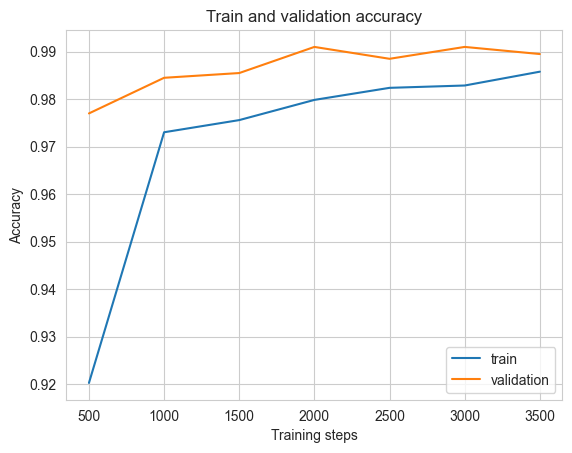

Validation accuracy: 0.990
Test accuracy: 0.987


In [91]:
steps = (np.arange(len(train_accuracies), dtype=int) + 1) * validation_every_steps

plt.figure()
plt.plot(steps, train_accuracies, label='train')
plt.plot(steps, valid_accuracies, label='validation')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train and validation accuracy")
plt.show()

# Evaluate test set
with torch.no_grad():
    model.eval()
    test_accuracies = []
    for inputs, targets in test_loader:
        output = model(inputs)
        loss = loss_fn(output, targets)

        predictions = output.max(1)[1]

        # Multiply by len(x) because the final batch of DataLoader may be smaller (drop_last=True).
        test_accuracies.append(accuracy_score(targets, predictions) * len(inputs))

    test_accuracy = np.sum(test_accuracies) / len(x_test)
    print(f"Validation accuracy: {valid_accuracies[-1]:.3f}")
    print(f"Test accuracy: {test_accuracy:.3f}")
    
    model.train()

Test accuracy is now the same as for dropout only. Thus I conclude that it might be a tuning issues. 

Again, if you didn't already, you really should [watch this video](https://www.youtube.com/watch?v=AgkfIQ4IGaM).